In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load data

In [179]:

#df=pd.read_csv('Human_Gait_Recogn.csv') 

Dataset for TRaining **Durting train uncomment**

In [180]:
df=pd.read_csv('Test_data.csv')


Dataset for Testing **Durting train comment**

In [181]:
df.head()

,timeElapsed,x,y,z,label
0,0,2.87,5.01,-0.272407,Walking
1,1,12.83,6.21,0.612916,Jogging
2,2,-9.23,19.57,-8.662541,Jogging
3,3,2.56,14.33,2.601486,Upstairs
4,4,-2.41,4.25,-2.833032,Walking


In [182]:
df.columns

Index(['timeElapsed', 'x', 'y', 'z', 'label'], dtype='object')

In [183]:
df['label'].unique()

array(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Standing',
       'Sitting'], dtype=object)

In [184]:
#df_test=df.sample(n=200000)

In [185]:
#df_test.shape

## Plot Axies of Accelerometer Dataset 

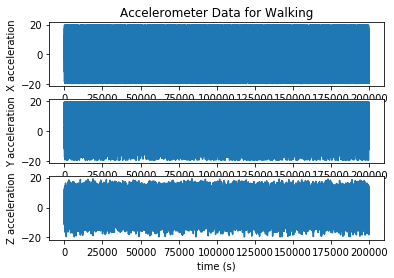

<Figure size 720x720 with 0 Axes>

In [186]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [187]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [188]:
def Filter (Data):
        a=0.6  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [189]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


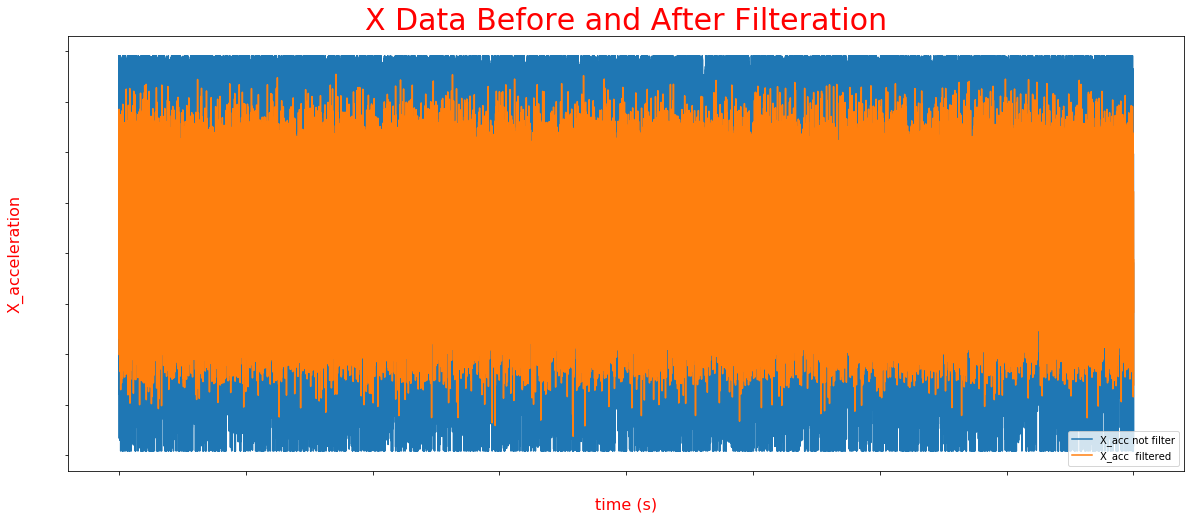

In [190]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


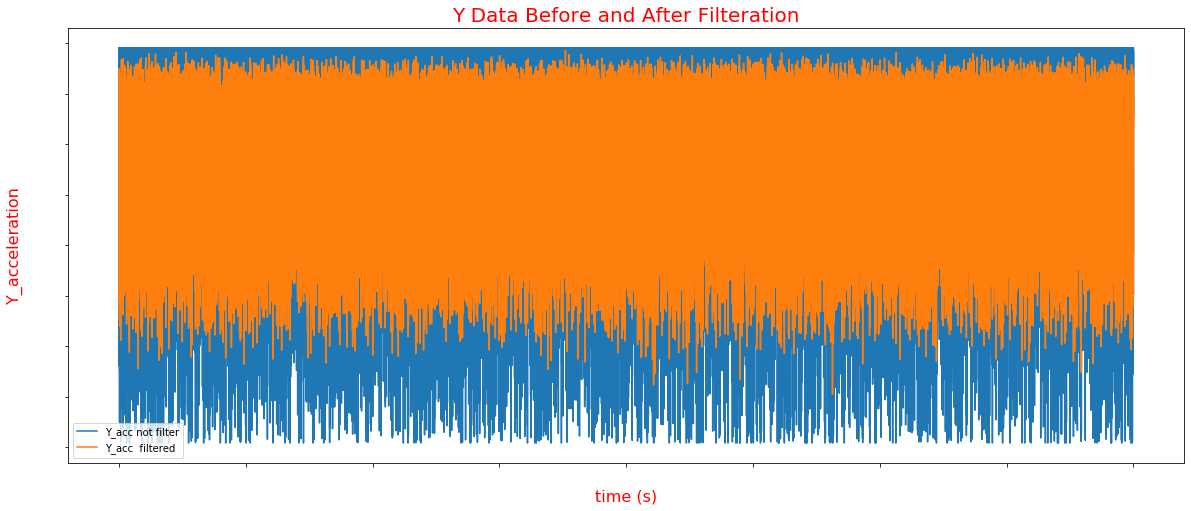

In [191]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

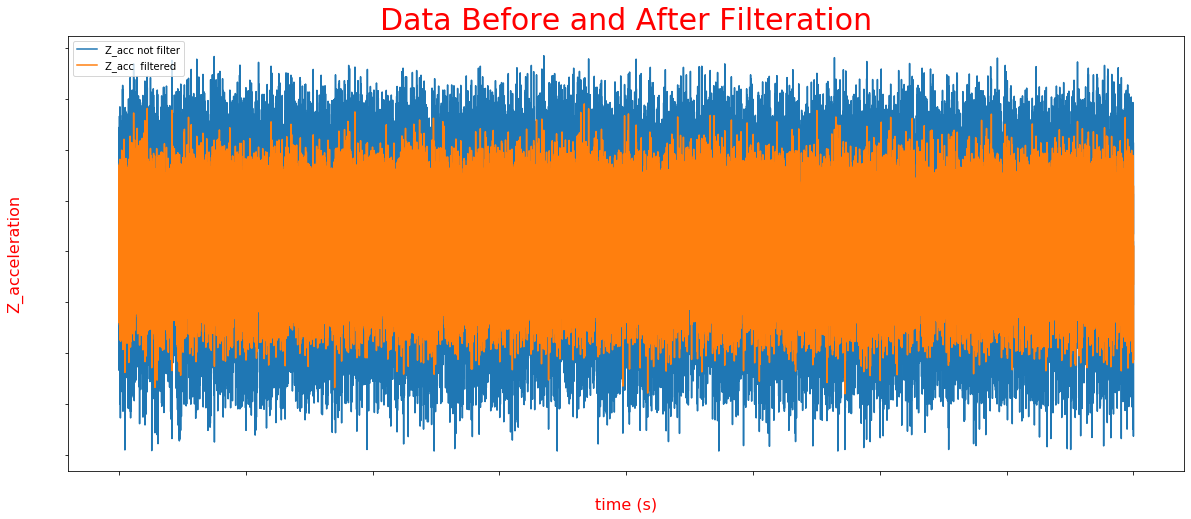

In [192]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [193]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 4)
Y_smoothed = gaussian_filter1d(Y_filtered, 4)
Z_smoothed = gaussian_filter1d(Z_filtered, 4)


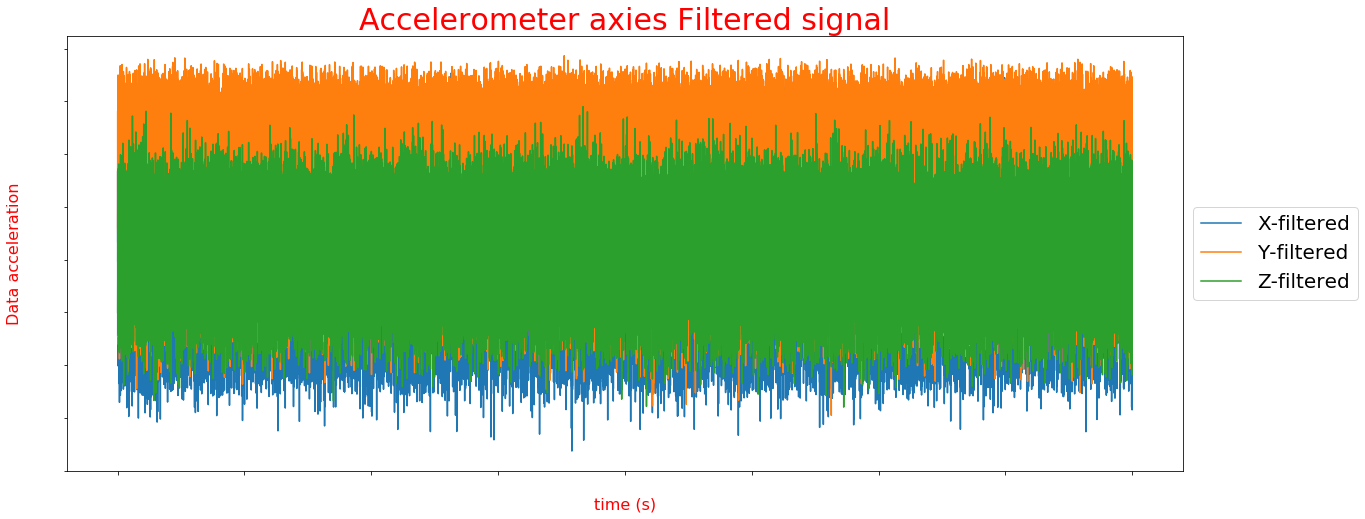

In [194]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

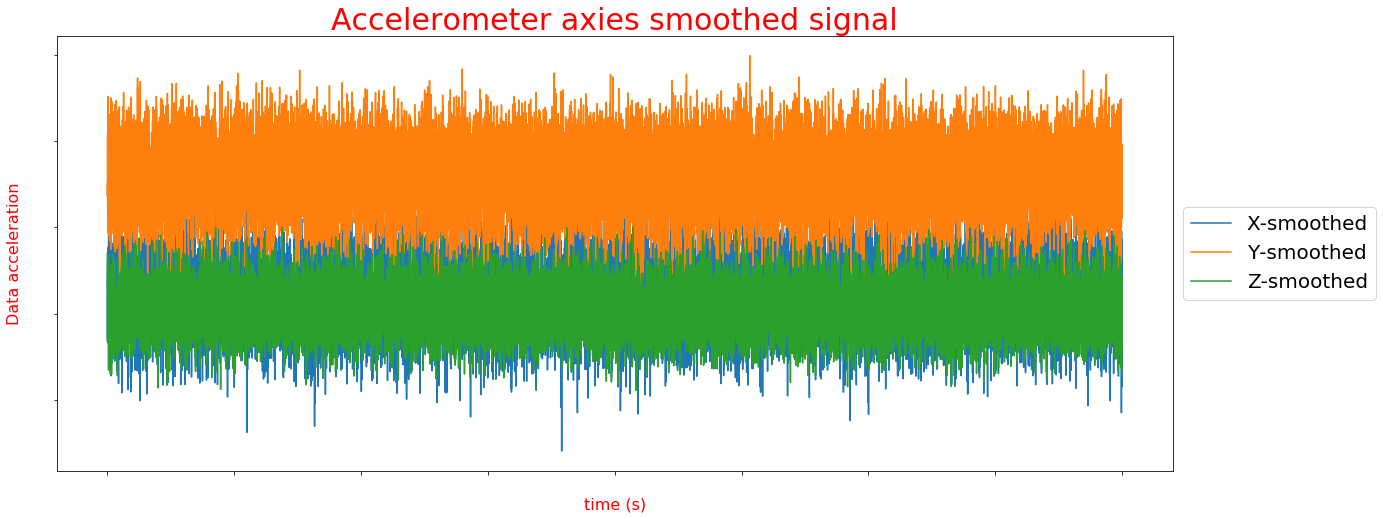

In [195]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [196]:
df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

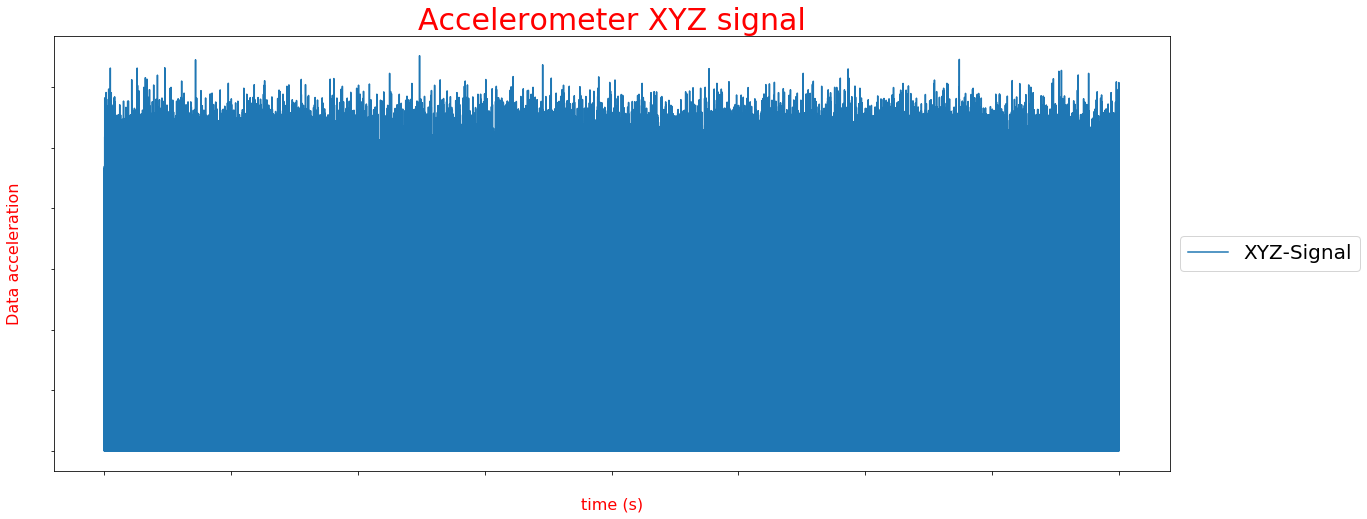

In [197]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')

plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [198]:

XYZ_smoothed=X_smoothed**2+Y_smoothed**2+Z_smoothed**2

In [199]:
xyz_smoothed=pd.DataFrame(XYZ_smoothed)

In [200]:
xyz_smoothed=xyz_smoothed.apply(np.sqrt)

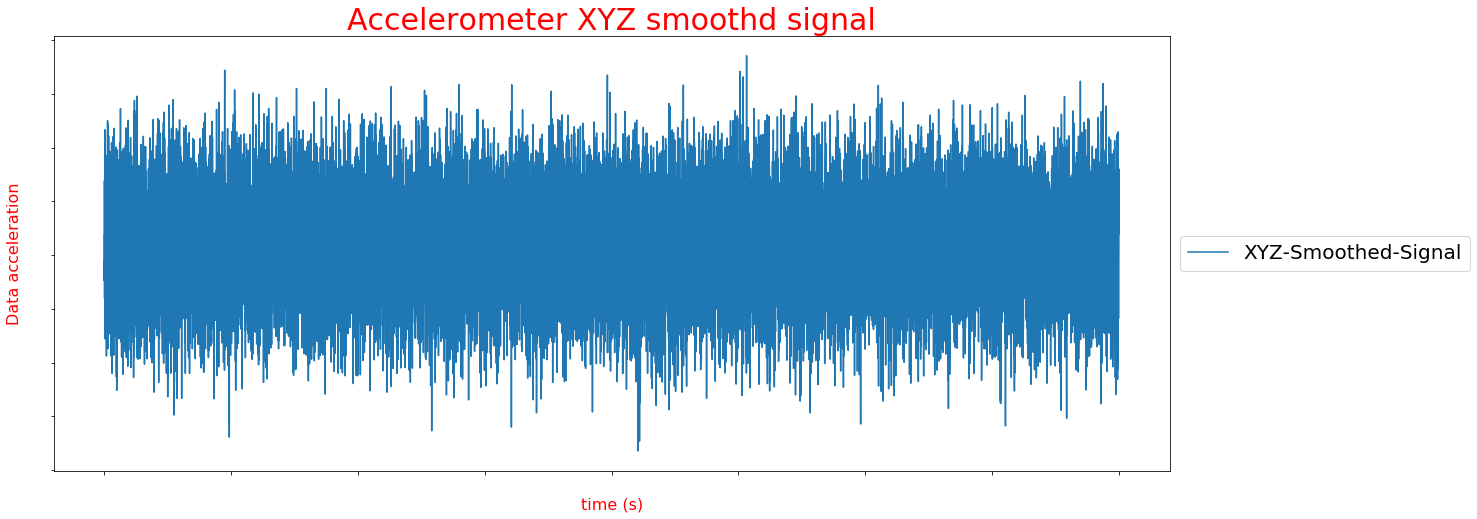

In [201]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ-Smoothed-Signal')

plt.title('Accelerometer XYZ smoothd signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

## SET Peak And Valley for signal data & Perfom Segmentation 

In [202]:
peak=xyz_smoothed.values.flatten()

In [203]:
peak.shape

(200000,)

In [204]:
inv_peak=peak*-1 

Get Inverse of peak to find Valley 


In [205]:
from scipy.signal import find_peaks,peak_widths,find_peaks_cwt
peak_x, _ = find_peaks(peak)  ##Detect Peaks
valley, _ = find_peaks(inv_peak) ##detect valley

In [206]:
peak_x

array([    29,     66,     88, ..., 199951, 199963, 199983], dtype=int64)

In [207]:
list_of_valley=list(valley)

In [208]:
len(list_of_valley)

9637

In [209]:
t=df['timeElapsed']

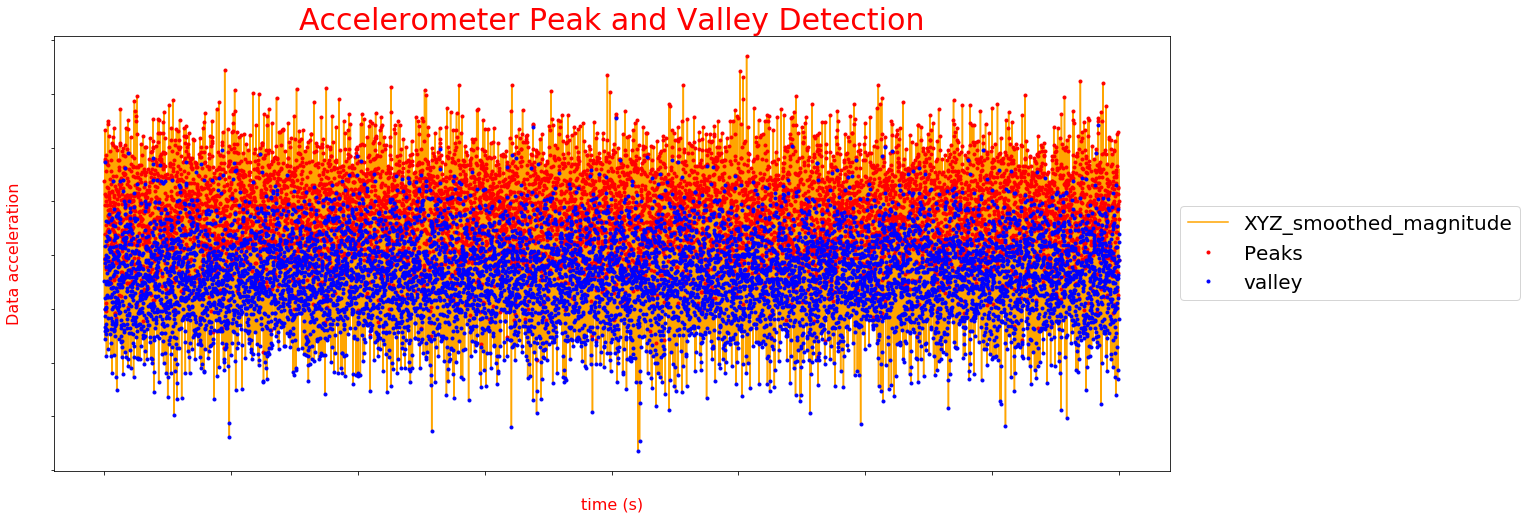

In [210]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
plt.plot(t[valley], peak[valley], 'b.',label='valley')

plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

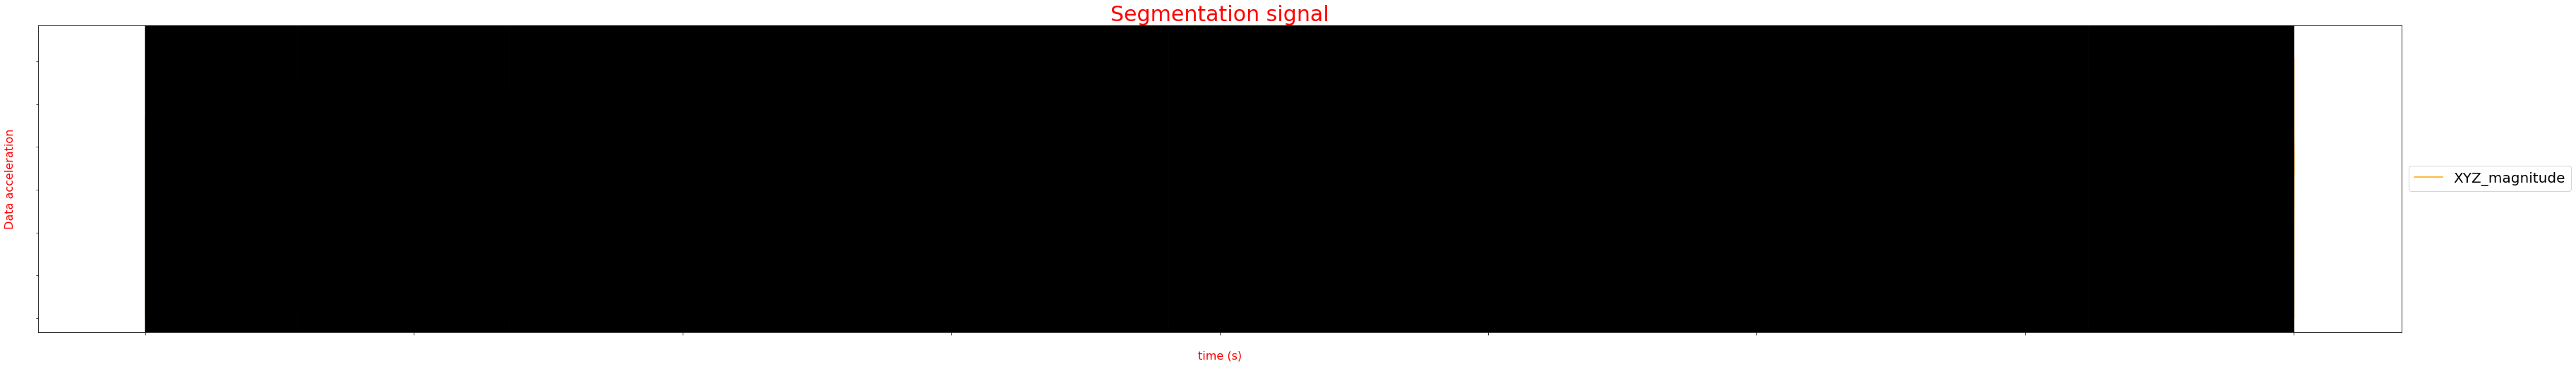

In [211]:
plt.figure(figsize=(60,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
    plt.axvline(t[i],color='black')
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

Calculate The Hight of each wave

In [212]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
hight_xyz

[17.659311122683263,
 23.459930128909143,
 18.098859050698117,
 29.096146253151534,
 22.54470452072948,
 26.98367936706707,
 21.973059733085673,
 19.802366467266967,
 17.728053536232185,
 27.677932307884273,
 20.474659717480588,
 23.866310022098933,
 19.284886300564153,
 23.05636579031165,
 26.77305519073955,
 23.548361730150305,
 15.177080561215323,
 13.304779633164861,
 29.540890863721916,
 19.81396504920783,
 26.02962103976562,
 27.34953738282242,
 19.172347736195363,
 19.30170537544672,
 20.311912765336526,
 22.24732583978828,
 24.172114781754804,
 14.109921670391957,
 26.734305289349543,
 28.009253739069095,
 28.423129818011528,
 23.212254984239777,
 27.688952705492497,
 24.528208363942852,
 21.441072869182907,
 18.117269672695663,
 22.96573190441244,
 13.493548627377496,
 28.99435005763882,
 15.806607893152268,
 26.274027184569505,
 24.532241646812547,
 18.189704773783475,
 26.434323544167224,
 21.0145815092204,
 19.84032472823216,
 25.22970429072018,
 24.504112308143494,
 21.705

Calculate the Mean of every wave

In [213]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
mean_xyz

[10.738367257892573,
 11.324922702542048,
 11.86188546096457,
 13.275647389650223,
 10.084708248193332,
 10.346962134178094,
 11.735840327068045,
 11.978743969728608,
 12.130813874874136,
 12.53776967876193,
 10.220754411961073,
 12.18248814695913,
 12.491554841406188,
 11.93236284080392,
 12.556351195674536,
 10.522850494198687,
 10.308866571858273,
 11.044486660559311,
 12.75802240725311,
 11.5938444050593,
 13.225380374857668,
 11.22300941353809,
 9.545586518436975,
 11.958627041213305,
 11.826341962947653,
 10.757262500237816,
 12.109164428715399,
 10.058068119796335,
 11.957699641106371,
 10.565863983764313,
 13.086413330861049,
 10.737333728430723,
 10.513772280450736,
 10.774084934697338,
 13.635092917715395,
 10.218341829119092,
 11.758347593543274,
 12.195258405031955,
 12.568450557007314,
 11.297269280807068,
 14.269007730017215,
 12.267600854116097,
 12.754212429162296,
 12.874755997556843,
 13.238534952126205,
 13.711102822872116,
 12.661973727204106,
 11.855185532453392,
 

Calculating the width of each wave

In [214]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])
width_xyz

[8,
 44,
 24,
 24,
 10,
 17,
 31,
 24,
 16,
 17,
 12,
 18,
 19,
 18,
 28,
 16,
 17,
 9,
 14,
 24,
 19,
 14,
 21,
 24,
 19,
 31,
 23,
 13,
 38,
 29,
 39,
 15,
 24,
 25,
 26,
 13,
 32,
 16,
 14,
 14,
 22,
 29,
 25,
 28,
 15,
 15,
 23,
 27,
 19,
 22,
 26,
 22,
 23,
 14,
 13,
 32,
 6,
 15,
 13,
 24,
 20,
 13,
 33,
 13,
 21,
 15,
 41,
 19,
 28,
 20,
 20,
 26,
 22,
 23,
 34,
 14,
 19,
 20,
 13,
 22,
 14,
 12,
 14,
 19,
 20,
 17,
 15,
 19,
 12,
 25,
 21,
 18,
 16,
 47,
 24,
 13,
 25,
 20,
 26,
 16,
 16,
 9,
 14,
 8,
 24,
 24,
 8,
 25,
 17,
 19,
 20,
 26,
 7,
 16,
 17,
 30,
 18,
 26,
 9,
 23,
 14,
 24,
 17,
 21,
 30,
 22,
 31,
 9,
 12,
 10,
 18,
 12,
 23,
 24,
 13,
 18,
 24,
 20,
 22,
 21,
 31,
 35,
 14,
 13,
 22,
 21,
 24,
 26,
 13,
 29,
 10,
 25,
 28,
 6,
 20,
 20,
 11,
 42,
 9,
 22,
 30,
 41,
 21,
 24,
 12,
 24,
 17,
 20,
 12,
 15,
 14,
 15,
 17,
 32,
 21,
 13,
 20,
 19,
 22,
 20,
 10,
 17,
 18,
 21,
 12,
 29,
 30,
 16,
 14,
 22,
 32,
 32,
 27,
 14,
 18,
 8,
 11,
 10,
 19,
 12,
 13,
 18,
 1

Calculating The standered deviassion of each wave

In [215]:
import statistics
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
std_xyz

[6.23055670257311,
 5.168649814113164,
 5.829245225876251,
 7.7144198988938415,
 6.991488093486958,
 6.646880637483363,
 5.501514095015257,
 5.700072710289967,
 5.057201625047946,
 8.374896843851568,
 6.7550244868641816,
 6.322768493266303,
 5.141266132185319,
 5.987618134025158,
 6.161552496774107,
 5.759919523747133,
 4.083262248329954,
 4.25647652504514,
 7.131294598867306,
 5.77099959849988,
 6.433381114673141,
 8.851373718371145,
 5.251721224881249,
 4.925660069626503,
 5.653628257600782,
 6.947038871747994,
 5.658416710696931,
 4.245388462791211,
 6.904306932512271,
 5.260632084042217,
 7.027240342674384,
 5.868258336717997,
 6.987103596070373,
 7.1574036788671425,
 6.510974423886907,
 5.301976300037905,
 5.825438324153961,
 3.869639813504202,
 7.442559198113226,
 4.814719501259949,
 7.502959006126986,
 6.081235861433416,
 5.125805695260459,
 5.597034456923233,
 5.9289601507425775,
 5.992042304877497,
 5.793700394530825,
 6.749156086248293,
 5.4344892562502025,
 5.594989746017637

In [216]:
list_of_valley

[8,
 52,
 76,
 100,
 110,
 127,
 158,
 182,
 198,
 215,
 227,
 245,
 264,
 282,
 310,
 326,
 343,
 352,
 366,
 390,
 409,
 423,
 444,
 468,
 487,
 518,
 541,
 554,
 592,
 621,
 660,
 675,
 699,
 724,
 750,
 763,
 795,
 811,
 825,
 839,
 861,
 890,
 915,
 943,
 958,
 973,
 996,
 1023,
 1042,
 1064,
 1090,
 1112,
 1135,
 1149,
 1162,
 1194,
 1200,
 1215,
 1228,
 1252,
 1272,
 1285,
 1318,
 1331,
 1352,
 1367,
 1408,
 1427,
 1455,
 1475,
 1495,
 1521,
 1543,
 1566,
 1600,
 1614,
 1633,
 1653,
 1666,
 1688,
 1702,
 1714,
 1728,
 1747,
 1767,
 1784,
 1799,
 1818,
 1830,
 1855,
 1876,
 1894,
 1910,
 1957,
 1981,
 1994,
 2019,
 2039,
 2065,
 2081,
 2097,
 2106,
 2120,
 2128,
 2152,
 2176,
 2184,
 2209,
 2226,
 2245,
 2265,
 2291,
 2298,
 2314,
 2331,
 2361,
 2379,
 2405,
 2414,
 2437,
 2451,
 2475,
 2492,
 2513,
 2543,
 2565,
 2596,
 2605,
 2617,
 2627,
 2645,
 2657,
 2680,
 2704,
 2717,
 2735,
 2759,
 2779,
 2801,
 2822,
 2853,
 2888,
 2902,
 2915,
 2937,
 2958,
 2982,
 3008,
 3021,
 3050,
 

In [217]:
df_feature=pd.DataFrame({'Acc_Mean':mean_xyz,
                        'Acc_STD':std_xyz
                        ,'peak_height':hight_xyz
                        ,'peak_width':width_xyz})

In [218]:
df_feature.shape

(9637, 4)

In [219]:
list_of_label=[]

In [220]:
counter=0
for i in  list_of_valley:
    x=df['label'].loc[i]
    list_of_label.append(x)  

    

In [221]:
for i in range(0,len(list_of_valley)):
    print(str(i)+'------>'+str(list_of_valley[i])+'------>'+str(list_of_label[i]))

0------>8------>Jogging
1------>52------>Jogging
2------>76------>Walking
3------>100------>Walking
4------>110------>Upstairs
5------>127------>Downstairs
6------>158------>Jogging
7------>182------>Walking
8------>198------>Downstairs
9------>215------>Jogging
10------>227------>Jogging
11------>245------>Jogging
12------>264------>Downstairs
13------>282------>Jogging
14------>310------>Jogging
15------>326------>Jogging
16------>343------>Jogging
17------>352------>Jogging
18------>366------>Upstairs
19------>390------>Jogging
20------>409------>Walking
21------>423------>Jogging
22------>444------>Jogging
23------>468------>Jogging
24------>487------>Jogging
25------>518------>Upstairs
26------>541------>Walking
27------>554------>Walking
28------>592------>Jogging
29------>621------>Jogging
30------>660------>Walking
31------>675------>Walking
32------>699------>Jogging
33------>724------>Jogging
34------>750------>Jogging
35------>763------>Upstairs
36------>795------>Walking
37

1798------>37457------>Downstairs
1799------>37488------>Walking
1800------>37508------>Jogging
1801------>37538------>Jogging
1802------>37549------>Walking
1803------>37563------>Jogging
1804------>37596------>Jogging
1805------>37610------>Jogging
1806------>37623------>Jogging
1807------>37636------>Walking
1808------>37651------>Upstairs
1809------>37671------>Jogging
1810------>37708------>Walking
1811------>37728------>Jogging
1812------>37739------>Downstairs
1813------>37766------>Jogging
1814------>37803------>Walking
1815------>37821------>Jogging
1816------>37854------>Jogging
1817------>37878------>Jogging
1818------>37920------>Jogging
1819------>37949------>Jogging
1820------>37965------>Walking
1821------>37982------>Jogging
1822------>38008------>Walking
1823------>38020------>Upstairs
1824------>38033------>Walking
1825------>38053------>Walking
1826------>38067------>Jogging
1827------>38094------>Walking
1828------>38111------>Jogging
1829------>38134------>Walking


2898------>59848------>Walking
2899------>59860------>Jogging
2900------>59872------>Jogging
2901------>59890------>Jogging
2902------>59908------>Jogging
2903------>59925------>Jogging
2904------>59943------>Jogging
2905------>59956------>Walking
2906------>59977------>Downstairs
2907------>59989------>Upstairs
2908------>59999------>Walking
2909------>60020------>Jogging
2910------>60039------>Jogging
2911------>60062------>Walking
2912------>60092------>Jogging
2913------>60114------>Jogging
2914------>60135------>Jogging
2915------>60154------>Jogging
2916------>60168------>Jogging
2917------>60187------>Jogging
2918------>60200------>Walking
2919------>60221------>Walking
2920------>60253------>Jogging
2921------>60272------>Walking
2922------>60291------>Downstairs
2923------>60316------>Walking
2924------>60333------>Jogging
2925------>60365------>Downstairs
2926------>60377------>Jogging
2927------>60403------>Jogging
2928------>60418------>Walking
2929------>60429------>Joggin

5039------>104250------>Walking
5040------>104270------>Walking
5041------>104278------>Jogging
5042------>104308------>Upstairs
5043------>104328------>Walking
5044------>104344------>Downstairs
5045------>104370------>Upstairs
5046------>104379------>Walking
5047------>104402------>Upstairs
5048------>104435------>Walking
5049------>104448------>Jogging
5050------>104465------>Jogging
5051------>104493------>Jogging
5052------>104505------>Walking
5053------>104537------>Walking
5054------>104561------>Upstairs
5055------>104602------>Upstairs
5056------>104636------>Jogging
5057------>104662------>Jogging
5058------>104675------>Walking
5059------>104690------>Jogging
5060------>104701------>Walking
5061------>104718------>Walking
5062------>104734------>Walking
5063------>104744------>Jogging
5064------>104773------>Jogging
5065------>104787------>Walking
5066------>104809------>Jogging
5067------>104828------>Walking
5068------>104850------>Jogging
5069------>104878------>Walking


6112------>126985------>Jogging
6113------>127009------>Jogging
6114------>127039------>Jogging
6115------>127062------>Downstairs
6116------>127092------>Jogging
6117------>127115------>Jogging
6118------>127142------>Walking
6119------>127165------>Jogging
6120------>127182------>Jogging
6121------>127201------>Jogging
6122------>127213------>Downstairs
6123------>127228------>Jogging
6124------>127243------>Jogging
6125------>127289------>Upstairs
6126------>127309------>Jogging
6127------>127323------>Jogging
6128------>127330------>Downstairs
6129------>127350------>Jogging
6130------>127374------>Jogging
6131------>127400------>Jogging
6132------>127425------>Sitting
6133------>127438------>Upstairs
6134------>127449------>Upstairs
6135------>127475------>Downstairs
6136------>127515------>Jogging
6137------>127541------>Walking
6138------>127556------>Walking
6139------>127583------>Jogging
6140------>127611------>Downstairs
6141------>127626------>Jogging
6142------>127639-----

7570------>156843------>Walking
7571------>156859------>Jogging
7572------>156877------>Walking
7573------>156902------>Downstairs
7574------>156921------>Walking
7575------>156940------>Jogging
7576------>156956------>Jogging
7577------>156975------>Walking
7578------>156992------>Sitting
7579------>157014------>Jogging
7580------>157033------>Jogging
7581------>157052------>Jogging
7582------>157074------>Walking
7583------>157095------>Walking
7584------>157116------>Jogging
7585------>157127------>Jogging
7586------>157151------>Jogging
7587------>157166------>Jogging
7588------>157181------>Walking
7589------>157203------>Jogging
7590------>157219------>Walking
7591------>157258------>Jogging
7592------>157272------>Walking
7593------>157294------>Downstairs
7594------>157318------>Downstairs
7595------>157332------>Jogging
7596------>157340------>Jogging
7597------>157363------>Jogging
7598------>157381------>Jogging
7599------>157392------>Walking
7600------>157427------>Downsta

9598------>199146------>Walking
9599------>199163------>Jogging
9600------>199187------>Upstairs
9601------>199208------>Walking
9602------>199239------>Jogging
9603------>199265------>Walking
9604------>199279------>Walking
9605------>199295------>Jogging
9606------>199305------>Jogging
9607------>199323------>Walking
9608------>199334------>Jogging
9609------>199359------>Jogging
9610------>199385------>Jogging
9611------>199412------>Jogging
9612------>199433------>Walking
9613------>199444------>Jogging
9614------>199471------>Jogging
9615------>199505------>Jogging
9616------>199528------>Downstairs
9617------>199546------>Walking
9618------>199560------>Jogging
9619------>199578------>Jogging
9620------>199634------>Jogging
9621------>199666------>Jogging
9622------>199680------>Walking
9623------>199705------>Walking
9624------>199721------>Upstairs
9625------>199747------>Walking
9626------>199786------>Jogging
9627------>199818------>Jogging
9628------>199852------>Jogging
962

In [222]:
df_feature['label']=list_of_label

In [223]:
df_feature.shape

(9637, 5)

In [224]:
df_feature.head()

,Acc_Mean,Acc_STD,peak_height,peak_width,label
0,10.738367,6.230557,17.659311,8,Jogging
1,11.324923,5.168650,23.459930,44,Jogging
2,11.861885,5.829245,18.098859,24,Walking
3,13.275647,7.714420,29.096146,24,Walking
4,10.084708,6.991488,22.544705,10,Upstairs


In [225]:
X=df_feature.drop(columns=['label']).values
y=df_feature['label']

In [226]:
X.shape

(9637, 4)

In [227]:
y.shape

(9637,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [228]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

During train uncomment this cell

In [229]:
# print('X_train_shape ---->',X_train.shape)
# print('X_test_shape ---->',X_test.shape)
# print('Y_train_shape ---->',y_train.shape)
# print('Y_test_shape ---->',y_test.shape)

During train uncomment this cell

### Preprocessimg label data and feature

In [230]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y)
#y_labeled_test=le.transform(y_test)
y_labeled.shape


(9637,)

During train uncomment this line and change y to y_train

In [231]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X)
#x_Scaler_test=sc.transform(X_test)
x_Scaler_train.shape


(9637, 4)

During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [232]:
# from sklearn.svm import SVC
# classifier_SVC=SVC(kernel = 'rbf', random_state = 0)
# classifier_SVC.fit(x_Scaler_train,y_labeled)
# cv_svm_train = cross_val_score(classifier_SVC , x_Scaler_train , y_labeled, cv = 3)
# print("Cross validation for train data is : ", cv_svm_train)
# cv_svm_test = cross_val_score(classifier_SVC , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data is : ", cv_svm_test)
# y_pred = classifier_SVC.predict(x_Scaler_test)
# cm = confusion_matrix(y_labeled_test, y_pred)
# print("Confusion matrix is : ", cm)
# ax = sns.heatmap(cm,annot=True)


During train uncomment this cell

In [233]:
# y_pred_SVC=classifier_SVC.predict(x_Scaler_test)


During train uncomment this cell

### Using KNN Classification

In [234]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier_KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 3)
# classifier_KNN.fit(x_Scaler_train, y_labeled)
# cv_knn_train = cross_val_score(classifier_KNN , x_Scaler_train , y_labeled, cv = 3)
# print("Cross validation for train data is : ", cv_knn_train)
# cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data is : ", cv_knn_test)
# y_pred = classifier_KNN.predict(x_Scaler_test)
# cm = confusion_matrix(y_labeled_test, y_pred)
# print("Confusion matrix is : ", cm)
# ax = sns.heatmap(cm,annot=True)

During train uncomment this cell

In [235]:
# y_pred_Knn = classifier_KNN.predict(x_Scaler_test)

During train uncomment this cell

### Using Random forest Classifier

In [237]:
# from sklearn.ensemble import RandomForestClassifier
# classifier_RF = RandomForestClassifier(n_estimators = 17, criterion = 'entropy', random_state = 0)
# classifier_RF.fit(x_Scaler_train, y_labeled)
# cv_rf_train = cross_val_score(classifier_RF , x_Scaler_train , y_labeled, cv = 3)
# print("Cross validation for train data is : ", cv_rf_train)
# cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data is : ", cv_rf_test)
# y_pred = classifier_RF.predict(x_Scaler_test)
# cm = confusion_matrix(y_labeled_test, y_pred)
# print("Confusion matrix is : ", cm)
# ax = sns.heatmap(cm,annot=True)

During train uncomment this cell

In [238]:
# y_pred_RF= classifier_RF.predict(x_Scaler_test)

During train uncomment this cell

### Using Decision Tree Classifier

In [239]:
# from sklearn import tree
# classifier_DT = tree.DecisionTreeClassifier(max_depth = 5)
# classifier_DT.fit(x_Scaler_train, y_labeled)
# cv_dt_train = cross_val_score(classifier_DT , x_Scaler_train , y_labeled, cv = 3)
# print("Cross validation for train data is : ", cv_dt_train)
# cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data is : ", cv_dt_test)
# y_pred = classifier_DT.predict(x_Scaler_test)
# cm = confusion_matrix(y_labeled_test, y_pred)
# print("Confusion matrix is : ", cm)
# ax = sns.heatmap(cm,annot=True)

During train uncomment this cell

In [240]:
# y_pred_DT=classifier_DT.predict(x_Scaler_test)

During train uncomment this cell

### Using Navie Bayes Classifier

In [241]:
# from sklearn.naive_bayes import GaussianNB
# classifier_NB = GaussianNB()
# classifier_NB.fit(x_Scaler_train, y_labeled)
# cv_nv_train = cross_val_score(classifier_NB , x_Scaler_train , y_labeled, cv = 3)
# print("Cross validation for train data is : ", cv_nv_train)
# cv_nv_test = cross_val_score(classifier_NB , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data is : ", cv_nv_test)
# y_pred = classifier_NB.predict(x_Scaler_test)
# cm = confusion_matrix(y_labeled_test, y_pred)
# print("Confusion matrix is : ", cm)
# ax = sns.heatmap(cm,annot=True)

During train uncomment this cell

In [242]:
# y_pred_NB = classifier_NB.predict(x_Scaler_test)

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [243]:
# from sklearn.metrics import  accuracy_score

# print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
# print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
# print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
# print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
# print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  

During train uncomment this cell

In [244]:
y_prediction_test_SVC=classifier_SVC.predict(x_Scaler_train)
y_prediction_test_KNN=classifier_KNN.predict(x_Scaler_train)
y_prediction_test_RF=classifier_RF.predict(x_Scaler_train)
y_prediction_test_DT=classifier_DT.predict(x_Scaler_train)
y_prediction_test_NB=classifier_NB.predict(x_Scaler_train)


During train **comment** this cell

In [245]:
print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled, y_prediction_test_NB),2))

Accuracy of SVC          ---------> 0.33
Accuracy of Desicion Tree---------> 0.31
Accuracy of Random forest---------> 0.31
Accuracy of KNN          ---------> 0.29
Accuracy of Navie Bayes  ---------> 0.34


During train **comment** this cell

In [ ]:
# y_prediction_test_DT.shape